In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [44]:
print("=" * 60)
print("Part 1: Creating make_blobs Dataset")
print("=" * 60)

# TODO: Create make_blobs dataset
n_samples = 1000
n_classes = 4

X, y = make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=n_classes,
    cluster_std=1.5,
    random_state=42
)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Number of classes: {len(set(y))}")

for class_id in range(n_classes):
    print(f"  Class {class_id}: {sum(y == class_id)} samples")


Part 1: Creating make_blobs Dataset
X shape: (1000, 2)
y shape: (1000,)
Number of classes: 4
  Class 0: 250 samples
  Class 1: 250 samples
  Class 2: 250 samples
  Class 3: 250 samples



Part 2: Visualizing the Data


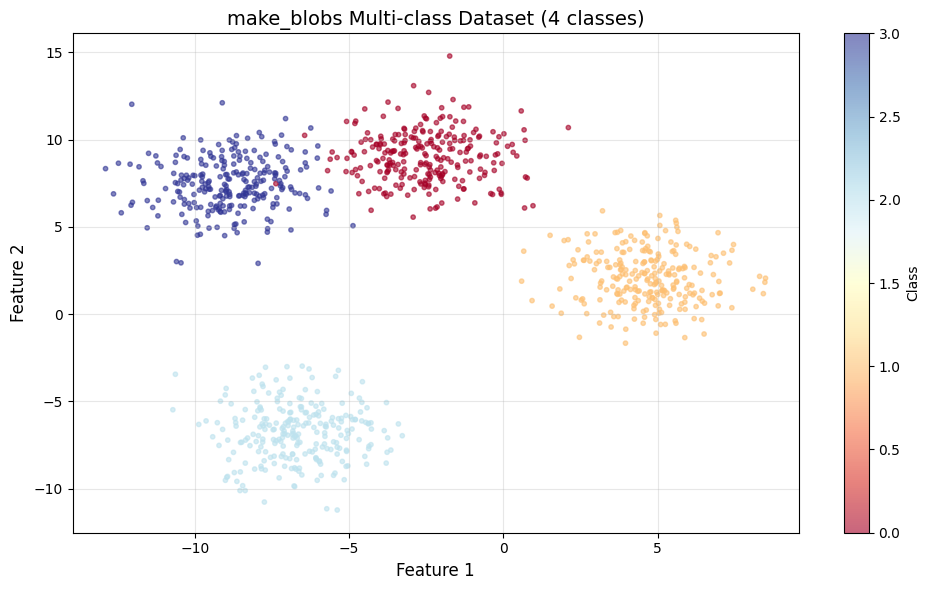

Visualization created!
Motto: Visualize, visualize, visualize!


In [45]:
print("\n" + "=" * 60)
print("Part 2: Visualizing the Data")
print("=" * 60)

# TODO: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
plt.title(f'make_blobs Multi-class Dataset ({n_classes} classes)', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Class')
plt.tight_layout()
plt.show()

print("Visualization created!")
print("Motto: Visualize, visualize, visualize!")


In [46]:
print("\n" + "=" * 60)
print("Part 3: Train/Test Split and Conversion")
print("=" * 60)

# TODO: Split data (stratified for multi-class)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

# TODO: Convert to PyTorch tensors
# IMPORTANT: For multi-class, y should be LongTensor (class indices)
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

# Move to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print(f"\nTensor shapes:")
print(f"X_train: {X_train.shape}, dtype: {X_train.dtype}")
print(f"y_train: {y_train.shape}, dtype: {y_train.dtype}")
print(f"X_test: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_test: {y_test.shape}, dtype: {y_test.dtype}")



Part 3: Train/Test Split and Conversion
Training size: 800
Test size: 200

Using device: cpu

Tensor shapes:
X_train: torch.Size([800, 2]), dtype: torch.float32
y_train: torch.Size([800]), dtype: torch.int64
X_test: torch.Size([200, 2]), dtype: torch.float32
y_test: torch.Size([200]), dtype: torch.int64


In [47]:
print("\n" + "=" * 60)
print("Part 4: Building Multi-Class Model")
print("=" * 60)

class BlobModel(nn.Module):
    def __init__(self, input_size=2, hidden_size=16, num_classes=4):
        super(BlobModel, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        return self.layer_stack(x)

model = BlobModel(input_size=2, hidden_size=16, num_classes=n_classes)
model = model.to(device)

print("BlobModel (Multi-class):")
print(model)

total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")


Part 4: Building Multi-Class Model
BlobModel (Multi-class):
BlobModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=4, bias=True)
  )
)

Total parameters: 116


In [48]:
print("\n" + "=" * 60)
print("Part 5: Loss Function and Optimizer")
print("=" * 60)

# TODO: Use CrossEntropyLoss for multi-class
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(f"Loss function: CrossEntropyLoss()")
print(f"Optimizer: Adam (lr=0.01)")

print("\nKey differences from binary:")
print("  - Binary: BCEWithLogitsLoss, y is FloatTensor with shape [N, 1]")
print("  - Multi-class: CrossEntropyLoss, y is LongTensor with shape [N]")



Part 5: Loss Function and Optimizer
Loss function: CrossEntropyLoss()
Optimizer: Adam (lr=0.01)

Key differences from binary:
  - Binary: BCEWithLogitsLoss, y is FloatTensor with shape [N, 1]
  - Multi-class: CrossEntropyLoss, y is LongTensor with shape [N]


In [49]:

def train_model(X_train, y_train, num_classes, epochs=100, lr=0.01, hidden_size=16):
    """
    Reusable training function for multi-class classification
    """
    # Initialize model
    model = BlobModel(input_size=2, hidden_size=hidden_size, num_classes=num_classes)
    model = model.to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)


    epochs = 100
    model.train()
    # Training
    train_losses = []
    train_accuracies = []

    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_logits = model(X_train)
        loss = criterion(y_logits, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track metrics
        train_losses.append(loss.item())
        with torch.no_grad():
            y_pred = torch.argmax(y_logits, dim=1)
            accuracy = (y_pred == y_train).float().mean()
            train_accuracies.append(accuracy.item())

        # Print progress
        if (epoch + 1) % 20 == 0:
            print(f'  Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

    return model, train_losses, train_accuracies


In [50]:
print("\n" + "=" * 60)
print("Part 7: Logits → Probabilities → Labels Pipeline")
print("=" * 60)

def evaluate_model(model, X_test, y_test):
    """Evaluate a model on test data"""

    # Make predictions
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.softmax(test_logits, dim=1)
        test_preds = torch.argmax(test_probs, dim=1)

    # Show examples
    print("\nFirst 3 predictions:")
    for i in range(3):
        print(f"\nSample {i+1}:")
        print(f"  Logits: {test_logits[i].cpu().numpy()}")
        print(f"  Probabilities: {test_probs[i].cpu().numpy()}")
        print(f"  Predicted: {test_preds[i].item()}, Actual: {y_test[i].item()}")

    # Calculate test accuracy
    test_accuracy = (test_preds == y_test).float().mean()
    print(f"\nTest Accuracy: {test_accuracy.item()*100:.2f}%")

    return test_accuracy, test_preds

test_accuracy, test_preds = evaluate_model(model, X_test, y_test)


Part 7: Logits → Probabilities → Labels Pipeline

First 3 predictions:

Sample 1:
  Logits: [ 0.4026784 -1.1372275  0.6133727 -1.4209226]
  Probabilities: [0.38308603 0.08213413 0.47293308 0.06184669]
  Predicted: 2, Actual: 2

Sample 2:
  Logits: [ 1.1866528   1.0652547  -1.0967143   0.48445126]
  Probabilities: [0.40271994 0.35668153 0.04105342 0.19954503]
  Predicted: 0, Actual: 1

Sample 3:
  Logits: [-2.0840824 -4.0243716 -0.7235283 -4.7369175]
  Probabilities: [0.19560033 0.02810041 0.762519   0.01378028]
  Predicted: 2, Actual: 3

Test Accuracy: 44.50%



Part 8: Decision Boundary Visualization


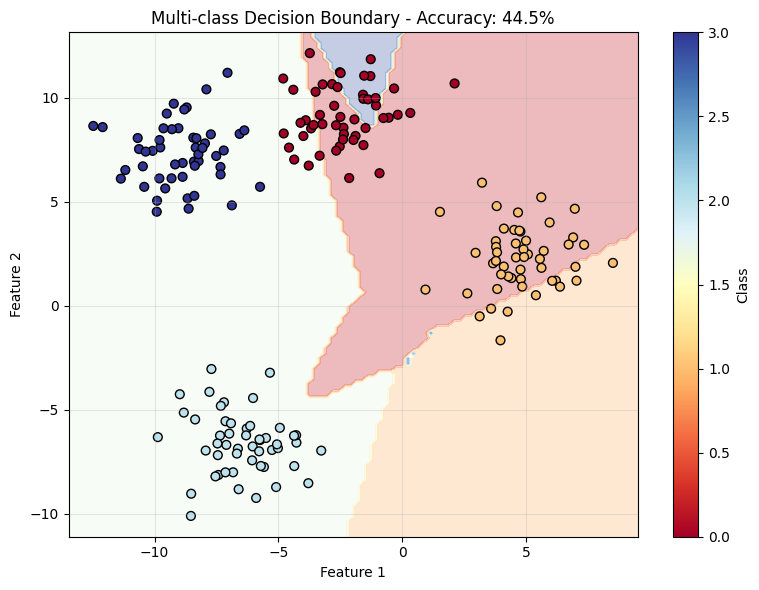

In [51]:
print("\n" + "=" * 60)
print("Part 8: Decision Boundary Visualization")
print("=" * 60)

def plot_multi_class_decision_boundary(model, X, y, title):
    """Plot decision boundary for multi-class model"""
    model.eval()

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Make predictions on meshgrid
    mesh = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)
    with torch.inference_mode():
        Z = torch.argmax(model(mesh), dim=1).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z.cpu().numpy(), alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='RdYlBu', edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class')
    plt.tight_layout()
    plt.show()

# Plot decision boundary
X_test_np = X_test.cpu().numpy()
y_test_np = y_test.cpu().numpy()

plot_multi_class_decision_boundary(
    model, X_test_np, y_test_np,
    f'Multi-class Decision Boundary - Accuracy: {test_accuracy*100:.1f}%'
)

In [52]:
print("\n" + "=" * 60)
print("Part 9: Per-Class Accuracy")
print("=" * 60)

for class_id in range(n_classes):
    class_mask = y_test == class_id
    class_acc = (test_preds[class_mask] == y_test[class_mask]).float().mean()
    print(f"Class {class_id} Accuracy: {class_acc.item()*100:.2f}%")



Part 9: Per-Class Accuracy
Class 0 Accuracy: 56.00%
Class 1 Accuracy: 22.00%
Class 2 Accuracy: 100.00%
Class 3 Accuracy: 0.00%


In [53]:
# Exercise 1: Vary number of classes
print("\nExercise 1: Vary number of classes")
print("Try different numbers of classes:")
print("  - n_classes=2 (binary)")
print("  - n_classes=3")
print("  - n_classes=4 (default)")
print("  - n_classes=5")
print("Tip: Modify the 'n_classes' and 'centers' parameters")

# Test different numbers of classes
class_configs = [2, 3, 4, 5]
results = {}

n_samples = 1000

for n_classes in class_configs:
    print(f"\n{'='*60}")
    print(f"Training with {n_classes} classes")
    print(f"{'='*60}")

    # Create dataset
    X, y = make_blobs(
        n_samples=n_samples,
        n_features=2,
        centers=n_classes,
        cluster_std=1.5,
        random_state=42
    )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Convert to tensors
    X_train = torch.FloatTensor(X_train).to(device)
    y_train = torch.LongTensor(y_train).to(device)
    X_test = torch.FloatTensor(X_test).to(device)
    y_test = torch.LongTensor(y_test).to(device)

    # Train model
    model, train_losses, train_accs = train_model(
        X_train, y_train,
        num_classes=n_classes,
        epochs=100,
        lr=0.01,
        hidden_size=16
    )

    # Evaluate
    test_acc, test_preds = evaluate_model(model, X_test, y_test)

    # Store results
    results[n_classes] = {
        'model': model,
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_acc': test_acc,
        'X_test': X_test.cpu().numpy(),
        'y_test': y_test.cpu().numpy()
    }

    print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")
    print(f"Total Parameters: {sum(p.numel() for p in model.parameters()):,}")



Exercise 1: Vary number of classes
Try different numbers of classes:
  - n_classes=2 (binary)
  - n_classes=3
  - n_classes=4 (default)
  - n_classes=5
Tip: Modify the 'n_classes' and 'centers' parameters

Training with 2 classes
  Epoch [20/100], Loss: 0.0161, Acc: 99.50%
  Epoch [40/100], Loss: 0.0075, Acc: 99.75%
  Epoch [60/100], Loss: 0.0046, Acc: 100.00%
  Epoch [80/100], Loss: 0.0032, Acc: 100.00%
  Epoch [100/100], Loss: 0.0025, Acc: 100.00%

First 3 predictions:

Sample 1:
  Logits: [-12.162311  10.911177]
  Probabilities: [9.534814e-11 1.000000e+00]
  Predicted: 1, Actual: 1

Sample 2:
  Logits: [ 5.192766 -4.124154]
  Probabilities: [9.999101e-01 8.988225e-05]
  Predicted: 0, Actual: 0

Sample 3:
  Logits: [ 1.0808464 -1.3765774]
  Probabilities: [0.92110264 0.07889736]
  Predicted: 0, Actual: 0

Test Accuracy: 100.00%

Final Test Accuracy: 100.00%
Total Parameters: 82

Training with 3 classes
  Epoch [20/100], Loss: 0.0491, Acc: 100.00%
  Epoch [40/100], Loss: 0.0136, Acc:

In [54]:

# Exercise 2: Change cluster standard deviation
print("\nExercise 2: Change cluster overlap")
print("Try different cluster_std values:")
print("  - cluster_std=0.5 (tight clusters)")
print("  - cluster_std=1.5 (default)")
print("  - cluster_std=3.0 (overlapping clusters)")

# Exercise 1: Vary number of classes
print("\nExercise 1: Vary number of classes")
print("Try different numbers of classes:")
print("  - n_classes=2 (binary)")
print("  - n_classes=3")
print("  - n_classes=4 (default)")
print("  - n_classes=5")
print("Tip: Modify the 'n_classes' and 'centers' parameters")

# Test different numbers of classes
class_configs = [0.5, 1.5, 3.0]
results = {}

n_samples = 1000

for n_cluster in class_configs:

    # Create dataset
    X, y = make_blobs(
        n_samples=n_samples,
        n_features=2,
        centers=4,
        cluster_std=n_cluster,
        random_state=42
    )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Convert to tensors
    X_train = torch.FloatTensor(X_train).to(device)
    y_train = torch.LongTensor(y_train).to(device)
    X_test = torch.FloatTensor(X_test).to(device)
    y_test = torch.LongTensor(y_test).to(device)

    # Train model
    model, train_losses, train_accs = train_model(
        X_train, y_train,
        num_classes=4,
        epochs=100,
        lr=0.01,
        hidden_size=16
    )

    # Evaluate
    test_acc, test_preds = evaluate_model(model, X_test, y_test)

    # Store results
    results[n_cluster] = {
        'model': model,
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_acc': test_acc,
        'X_test': X_test.cpu().numpy(),
        'y_test': y_test.cpu().numpy()
    }

    print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")
    print(f"Total Parameters: {sum(p.numel() for p in model.parameters()):,}")


print("Tip: Modify the 'cluster_std' parameter in make_blobs()")


Exercise 2: Change cluster overlap
Try different cluster_std values:
  - cluster_std=0.5 (tight clusters)
  - cluster_std=1.5 (default)
  - cluster_std=3.0 (overlapping clusters)

Exercise 1: Vary number of classes
Try different numbers of classes:
  - n_classes=2 (binary)
  - n_classes=3
  - n_classes=4 (default)
  - n_classes=5
Tip: Modify the 'n_classes' and 'centers' parameters
  Epoch [20/100], Loss: 0.0756, Acc: 100.00%
  Epoch [40/100], Loss: 0.0118, Acc: 100.00%
  Epoch [60/100], Loss: 0.0049, Acc: 100.00%
  Epoch [80/100], Loss: 0.0032, Acc: 100.00%
  Epoch [100/100], Loss: 0.0024, Acc: 100.00%

First 3 predictions:

Sample 1:
  Logits: [-13.471032   -7.0258484   2.0924706  -5.575448 ]
  Probabilities: [1.74022631e-07 1.09575616e-04 9.99423027e-01 4.67320235e-04]
  Predicted: 2, Actual: 2

Sample 2:
  Logits: [-0.9513343  5.654308  -3.45887   -6.544911 ]
  Probabilities: [1.35073136e-03 9.98534322e-01 1.10042376e-04 5.02700823e-06]
  Predicted: 1, Actual: 1

Sample 3:
  Logit

In [55]:
# Exercise 3: Compare binary vs multi-class
print("\nExercise 3: Compare binary vs multi-class")
print("Questions to answer:")
print("  - How is binary different from multi-class?")
print("  - What's different about the loss function?")
print("  - What's different about the output activation?")
print("Tip: Look at BCEWithLogitsLoss vs CrossEntropyLoss")

print("\nANSWERS:")

print("\n1. KEY DIFFERENCES:")
print("Binary Classification:")
print("  - 2 classes only (Yes/No, 0/1)")
print("  - Output: 1 neuron (single value)")
print("  - Example: Is it a cat? (Yes=1, No=0)")
print()
print("Multi-class Classification:")
print("  - 3+ classes (multiple categories)")
print("  - Output: N neurons (one per class)")
print("  - Example: Is it cat/dog/bird/fish? (4 outputs)")

print("\n2. LOSS FUNCTION DIFFERENCES:")
print("Binary: BCEWithLogitsLoss")
print("  - BCE = Binary Cross Entropy")
print("  - Works with single output value")
print("  - Applies sigmoid internally")
print()
print("Multi-class: CrossEntropyLoss")
print("  - Works with multiple output values")
print("  - Applies softmax internally")
print("  - Picks the highest probability class")

print("\n3. OUTPUT ACTIVATION DIFFERENCES:")
print("Binary:")
print("  - Sigmoid: converts to probability (0 to 1)")
print("  - Formula: 1 / (1 + e^-x)")
print("  - Output > 0.5 → Class 1, else → Class 0")
print()
print("Multi-class:")
print("  - Softmax: converts to probability distribution")
print("  - All outputs sum to 1.0")
print("  - Pick the highest value with argmax()")

print("\n4. EXAMPLE:")
print("Binary model output (raw): [2.3]")
print("  → After sigmoid: [0.91]")
print("  → Prediction: Class 1 (because 0.91 > 0.5)")
print()
print("Multi-class model output (raw): [-1.2, 0.5, 2.1, 0.8]")
print("  → After softmax: [0.05, 0.27, 0.54, 0.14]")
print("  → Prediction: Class 2 (because 0.54 is highest)")

print("\n5. CODE COMPARISON:")
print("BINARY:")
print("  model output → 1 value → Sigmoid → BCEWithLogitsLoss")
print("  y_train: FloatTensor [N, 1]")
print("  criterion = nn.BCEWithLogitsLoss()")
print()
print("MULTI-CLASS:")
print("  model output → N values → Softmax → CrossEntropyLoss")
print("  y_train: LongTensor [N] (class indices)")
print("  criterion = nn.CrossEntropyLoss()")


Exercise 3: Compare binary vs multi-class
Questions to answer:
  - How is binary different from multi-class?
  - What's different about the loss function?
  - What's different about the output activation?
Tip: Look at BCEWithLogitsLoss vs CrossEntropyLoss

ANSWERS:

1. KEY DIFFERENCES:
----------------------------------------
Binary Classification:
  - 2 classes only (Yes/No, 0/1)
  - Output: 1 neuron (single value)
  - Example: Is it a cat? (Yes=1, No=0)

Multi-class Classification:
  - 3+ classes (multiple categories)
  - Output: N neurons (one per class)
  - Example: Is it cat/dog/bird/fish? (4 outputs)

2. LOSS FUNCTION DIFFERENCES:
----------------------------------------
Binary: BCEWithLogitsLoss
  - BCE = Binary Cross Entropy
  - Works with single output value
  - Applies sigmoid internally

Multi-class: CrossEntropyLoss
  - Works with multiple output values
  - Applies softmax internally
  - Picks the highest probability class

3. OUTPUT ACTIVATION DIFFERENCES:
---------------

In [56]:
# Exercise 4: Experiment with model size
print("\nExercise 4: Experiment with model size")
print("Try different model sizes:")
print("  - hidden_size=8")
print("  - hidden_size=16 (default)")
print("  - hidden_size=32")
print("Tip: Modify the 'hidden_size' parameter in BlobModel()")


# Exercise 2: Change cluster standard deviation
print("\nExercise 2: Change cluster overlap")
print("Try different cluster_std values:")
print("  - cluster_std=0.5 (tight clusters)")
print("  - cluster_std=1.5 (default)")
print("  - cluster_std=3.0 (overlapping clusters)")

# Exercise 1: Vary number of classes
print("\nExercise 1: Vary number of classes")
print("Try different numbers of classes:")
print("  - n_classes=2 (binary)")
print("  - n_classes=3")
print("  - n_classes=4 (default)")
print("  - n_classes=5")
print("Tip: Modify the 'n_classes' and 'centers' parameters")

# Test different numbers of classes
class_configs = [8, 16, 32]
results = {}

n_samples = 1000

for n_hidden_size in class_configs:

    # Create dataset
    X, y = make_blobs(
        n_samples=n_samples,
        n_features=2,
        centers=4,
        cluster_std=1.5,
        random_state=42
    )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Convert to tensors
    X_train = torch.FloatTensor(X_train).to(device)
    y_train = torch.LongTensor(y_train).to(device)
    X_test = torch.FloatTensor(X_test).to(device)
    y_test = torch.LongTensor(y_test).to(device)

    # Train model
    model, train_losses, train_accs = train_model(
        X_train, y_train,
        hidden_size=n_hidden_size,
        num_classes=4,
        epochs=100,
        lr=0.01,
    )

    # Evaluate
    test_acc, test_preds = evaluate_model(model, X_test, y_test)

    # Store results
    results[n_hidden_size] = {
        'model': model,
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_acc': test_acc,
        'X_test': X_test.cpu().numpy(),
        'y_test': y_test.cpu().numpy()
    }

    print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")
    print(f"Total Parameters: {sum(p.numel() for p in model.parameters()):,}")


print("Tip: Modify the 'cluster_std' parameter in make_blobs()")


Exercise 4: Experiment with model size
Try different model sizes:
  - hidden_size=8
  - hidden_size=16 (default)
  - hidden_size=32
Tip: Modify the 'hidden_size' parameter in BlobModel()

Exercise 2: Change cluster overlap
Try different cluster_std values:
  - cluster_std=0.5 (tight clusters)
  - cluster_std=1.5 (default)
  - cluster_std=3.0 (overlapping clusters)

Exercise 1: Vary number of classes
Try different numbers of classes:
  - n_classes=2 (binary)
  - n_classes=3
  - n_classes=4 (default)
  - n_classes=5
Tip: Modify the 'n_classes' and 'centers' parameters
  Epoch [20/100], Loss: 0.4576, Acc: 75.00%
  Epoch [40/100], Loss: 0.0976, Acc: 99.25%
  Epoch [60/100], Loss: 0.0455, Acc: 99.12%
  Epoch [80/100], Loss: 0.0369, Acc: 99.12%
  Epoch [100/100], Loss: 0.0335, Acc: 99.12%

First 3 predictions:

Sample 1:
  Logits: [-7.464314  -6.2873387  1.8479718 -5.309518 ]
  Probabilities: [9.0203081e-05 2.9266797e-04 9.9883908e-01 7.7810319e-04]
  Predicted: 2, Actual: 2

Sample 2:
  Lo

In [57]:
class BlobModelV2(nn.Module):
    def __init__(self, input_size=2, hidden_size=16, num_classes=4):
        super(BlobModelV2, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        return self.layer_stack(x)

model_v2 = BlobModelV2(input_size=2, hidden_size=16, num_classes=4)
model_v2 = model_v2.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_v2.parameters(), lr=0.01)
epochs = 100

model_v2.train()
for epoch in range(epochs):
    y_logits = model_v2(X_train)
    loss = criterion(y_logits, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        with torch.no_grad():
            y_pred = torch.argmax(y_logits, dim=1)
            accuracy = (y_pred == y_train).float().mean()
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

#Eval
test_acc, test_preds = evaluate_model(model_v2, X_test, y_test)


Epoch [20/100], Loss: 0.0626, Acc: 99.25%
Epoch [40/100], Loss: 0.0220, Acc: 99.37%
Epoch [60/100], Loss: 0.0205, Acc: 99.50%
Epoch [80/100], Loss: 0.0193, Acc: 99.50%
Epoch [100/100], Loss: 0.0184, Acc: 99.50%

First 3 predictions:

Sample 1:
  Logits: [-8.392353  -4.928605   9.325664  -6.9893956]
  Probabilities: [2.0191212e-08 6.4483623e-07 9.9999917e-01 8.2121943e-08]
  Predicted: 2, Actual: 2

Sample 2:
  Logits: [ -2.2943296  11.354971   -4.590755  -12.552587 ]
  Probabilities: [1.1808195e-06 9.9999869e-01 1.1881149e-07 4.1407471e-11]
  Predicted: 1, Actual: 1

Sample 3:
  Logits: [ -1.8444377 -24.241817   -6.5362325   9.394996 ]
  Probabilities: [1.3145297e-05 2.4644017e-15 1.2054511e-07 9.9998677e-01]
  Predicted: 3, Actual: 3

Test Accuracy: 100.00%
